# Create a profile index from the time series of pyglider time series nc

In [3]:
import xarray as xr
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
#Simply change the working directory to the project directory

import os

current_dir = os.getcwd()
parent_parent_dir = os.path.dirname(current_dir)
os.chdir(parent_parent_dir)

# Now the working directory is set to the project directory
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\flapet\OneDrive - NOC\Documents\IDAPro\lib\db_building


In [54]:
dat = xr.open_dataset('data/glider/raw/pyglider_nc/L0-gridfiles/Bellamite_538_grid.nc')

In [55]:
display(dat)

<xarray.Dataset> Size: 78MB
Dimensions:                (depth: 1100, time: 467)
Coordinates:
  * depth                  (depth) float64 9kB 0.5 1.5 2.5 ... 1.098e+03 1.1e+03
    profile                (time) float64 4kB ...
  * time                   (time) datetime64[ns] 4kB 2019-12-06T10:10:36 ... ...
Data variables: (12/23)
    longitude              (time) float64 4kB ...
    latitude               (time) float64 4kB ...
    profile_time_start     (time) datetime64[ns] 4kB ...
    profile_time_end       (time) datetime64[ns] 4kB ...
    heading                (depth, time) float64 4MB ...
    pitch                  (depth, time) float64 4MB ...
    ...                     ...
    salinity               (depth, time) float64 4MB ...
    potential_density      (depth, time) float64 4MB ...
    density                (depth, time) float64 4MB ...
    potential_temperature  (depth, time) float64 4MB ...
    profile_index          (depth, time) float64 4MB ...
    profile_direction      (depth, time) float64 4MB ...
Attributes: (12/65)
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0
    acknowledgement:           TBD
    cdm_data_type:             Trajectory
    comment:                   Custard Slocum deployment
    contributor_name:          Adrian Martin, Filipa Carvalho, Flavien Petit
    ...                        ...
    summary:                    
    time_coverage_end:         2020-01-01T23:48:52.000000000
    time_coverage_start:       2019-12-03T17:23:48.000000000
    title:                     Bellamite538-20191203T1723
    transmission_system:       IRIDIUM
    wmo_id:                    9999999

In [7]:
df_profile = dat[['chlorophyll', 'profile_index', 'profile_direction']].to_dataframe().reset_index()

In [9]:
df_profile.head()

,time,chlorophyll,profile_index,profile_direction,latitude,longitude,depth
0,2019-12-03 17:23:48,2.876400,NaN,NaN,NaN,NaN,0.049560
1,2019-12-03 17:45:33,3.110309,0.0,0.0,-52.656526,-78.679374,0.049560
2,2019-12-03 17:45:43,3.133475,0.0,0.0,-52.656528,-78.680050,0.049560
3,2019-12-03 17:45:53,3.127302,0.0,0.0,-52.656530,-78.680720,0.059471
4,2019-12-03 17:46:03,3.135536,0.0,0.0,-52.656531,-78.681397,0.059471


In [47]:
t = df_profile[df_profile['profile_index'].isin(range(130,139))]

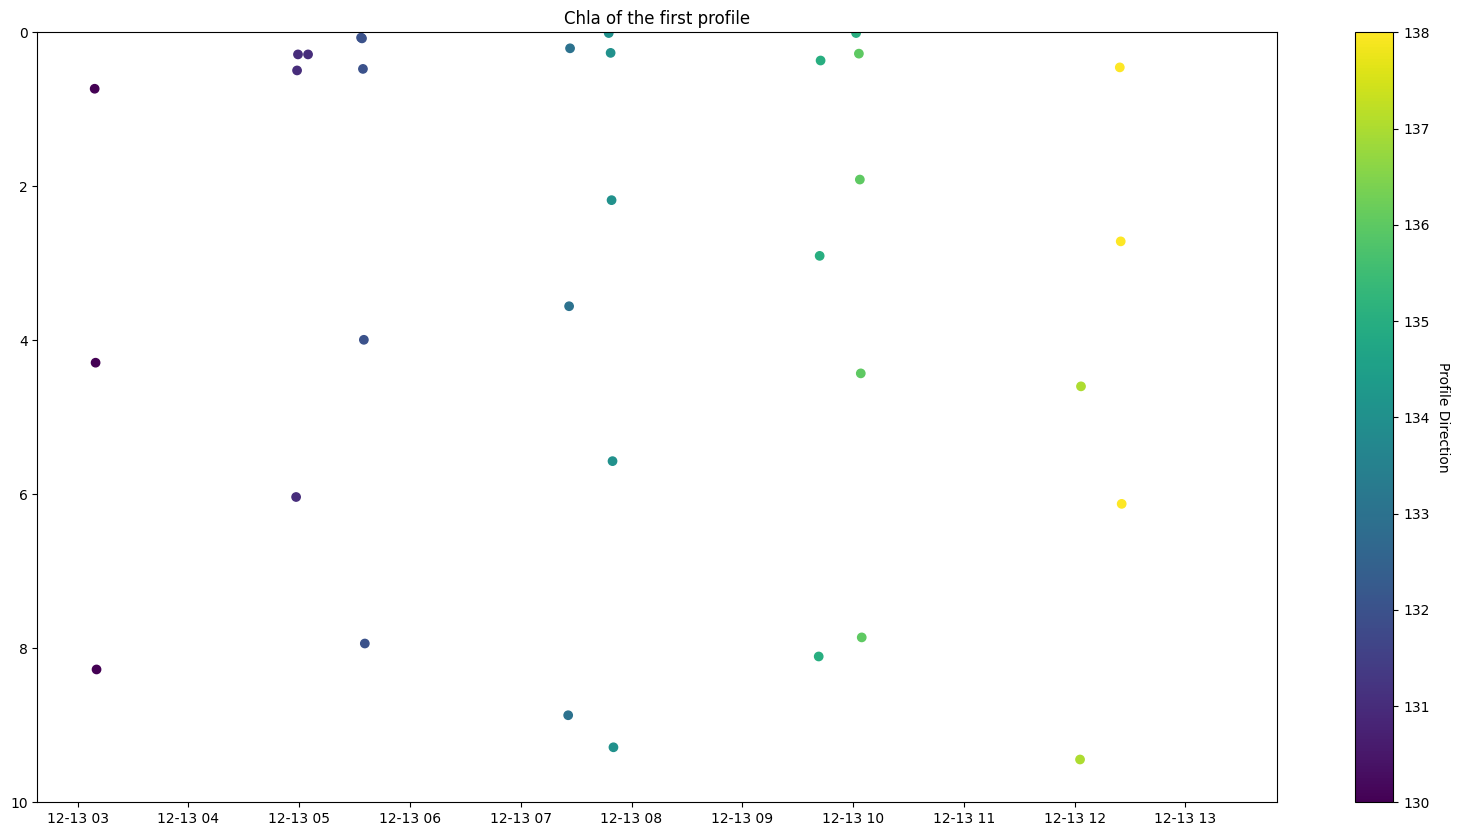

In [20]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

sc = ax.scatter( t['time'], t['depth'], c = t['profile_index'])

#set the plot color bar
cbar = plt.colorbar(sc, ax = ax, label='profile_direction')
cbar.set_label('Profile Direction', rotation=270, labelpad=15)

#set the depth axis
ax.set_ylim(0, 10)
plt.gca().invert_yaxis()


# set the plot title
ax.set_title("Chla of the first profile")
plt.show()

C:\Users\flapet\AppData\Local\Temp\ipykernel_21900\2634525144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['profile_name'] = t['profile_index'].astype(str)


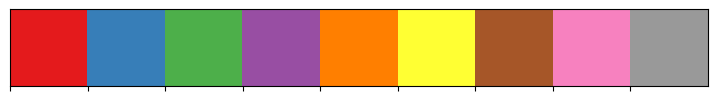

In [49]:
t['profile_name'] = t['profile_index'].astype(str)
N = len(t['profile_name'].unique())
sns.palplot(sns.color_palette("Set1", N))


C:\Users\flapet\AppData\Local\Temp\ipykernel_21900\963194730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['time'] = t['time'].dt.strftime('%H:%M:%S')


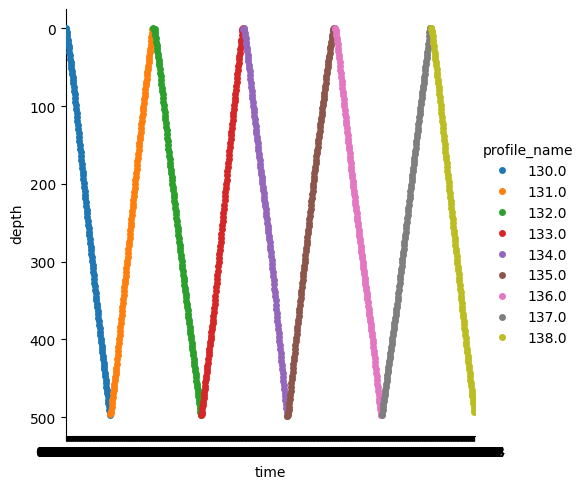

In [50]:

# Unique category labels: 'D', 'F', 'G', ...
color_labels = t['profile_name'].unique()
t['time'] = t['time'].dt.strftime('%H:%M:%S')
# List of RGB triplets
rgb_values = sns.color_palette("Set1", N)

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

sns.catplot(data = t, x = 'time', y = 'depth', hue= 'profile_name')

# Set the depth axis
plt.gca().invert_yaxis() 

# Set the plot title
plt.show()

In [18]:
N

30